In [1]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import jieba
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = True

In [2]:
image = Image.open("wordcloudshape.png")
cloud_shape =  np.array(image)

# import cv2
# cloud_shape = cv2.imread("wordcloudshape.png")

In [4]:
cloud_shape.shape

(831, 1024, 3)

In [15]:
mytext = '''
康美药业巨幅修正财务数据 近300亿银行存款都会算错？
时间：2019-05-01 12:41:19来源：金融界
来源：每日经济新闻
4月30日，康美药业（600518，SH）抢在年报发布的最后窗口对外披露了去年业绩情况。
《每日经济新闻》记者注意到，年报发布同日，康美药业修正了2017年年报中的14处数据。其中，货币资金向下修正，减少299.44亿元，新增存货195.46亿元。对于这些更正，康美药业给出的解释是：会计处理存在错误。
此番“会计处理存在错误”的解释仍有待进一步解释不说，因涉嫌信披违规、关联方占用资金、在建工程项目财务资料不完整等原因，审计机构对康美药业的2018年年报已出具保留意见的审计报告。
4月30日晚，康美药业已因此收到上交所下发的监管工作函。

图片来源：公告截图
被疑财务管理可能存在重大疑问
2018年12月28日，康美药业被证监会立案调查。进行自查核查后，康美药业称，2018年之前，公司营业收入、营业成本、费用及款项收付方面存在账实不符的情况。
于是有了这份前期会计差错更正公告。
《每日经济新闻》记者注意到，实际上，短短“账实不符”四字远不能掩盖康美药业此前的账目混乱，其调整2017年部分财务数据后，净额变动最大的是货币资金及存货，前者减少近300亿元，后者增加了近200亿元。
康美药业通过自查，对2017年财务报表进行了重述。其中一项是：由于公司采购付款、工程款支付以及确认业务款项时的会计处理存在错误，造成存货少计195.46亿元；同时，由于公司核算账户资金时存在错误，造成货币资金多计299.44亿元。
对前期差错进行追溯重述法更正后，相应的，2017年度合并财务报表也进行了追溯调整，结果是：
截至2017年末的货币资金期末余额（即货币资金2018年期初余额）原为341.51亿元，减去多计算的299.44亿元，因此仅剩下42.07亿元；
截至2017年末的存货账面价值原为157亿元，因少计算了195.46亿元，调整后，这一数据变更为352.47亿元。
此外，据康美药业披露，2017年年报数据中，还存在应收账款少计6.41亿元、在建工程少计6.32亿元、其他应收款少计57.14亿元等其他数据差错。
上交所的监管工作函认为，上述事项反映出公司在财务管理、信息披露、内部控制等方面可能存在重大疑问，将予以高度关注，并要求公司认真自查和核实有关情况。
近300亿元的银行存款会算错？
康美药业在更正公告中仅披露了各财务项目数额的变化，并未具体到是哪些细分项目变动。为了解其中究竟，对康美药业此前的2017年报与目前的2018年报，《每日经济新闻》记者进行了对比。
康美药业披露的货币资金包括3项（库存现金、银行存款及其他货币资金），对比原2017年年报的期末数据与2018年期初数据，可以发现货币资金减少的299.44亿元，来自于银行存款的变动。
原2017年年报显示，期末时银行存款在340.45亿元，而2018年年报中，期初银行存款金额仅剩下41亿元。

原2017年年报数据。图片来源：年报截图

2018年年报数据。图片来源：年报截图
因为银行存款的减少，康美药业对财务费用中的利息收入也作了相应调整。原2017年报披露的当期利息收入为2.69亿元，但在2018年报的披露中，利息收入的上期发生额（即2017年）为4122.87万元。减少了超过2亿元。
但依然让人费解的是，康美药业银行存款为何会出现核算错误，且错误金额近300亿元？
康美药业去年少计算了近200亿元的存货方面，主要的偏差则出现在“库存商品”及“开发成本”两个项目上。
原2017年报显示，2017年底库存商品账面价值为74.68亿元。而全新数据显示，库存商品2018年期初账面价值为252.92亿元，增加了178亿元。不过康美药业未披露库存商品具体名称。
同时，原2017年年报披露的期末开发成本15.1亿元，而2018年披露的期初数则增加至33.14亿元，多了18亿元。

原2017年年报数据。图片来源：年报截图

2018年年报数据。图片来源：年报截图
对于开发成本这一项目，康美药业有具体的分析，2018年报指出，开发成本主要指“康美（亳州）华佗国际中药城项目第三期”、“青海国际中药城项目第二期”、“甘肃定西中药材现代仓储物流及交易中心工程项目第二期”、“青海玉树虫草交易市场及加工中心项目”等开发所发生的相关成本。
细查可见，其中康美（亳州）华佗国际中药城项目的开发成本变动了12亿元。原2017年年报显示该项目期末余额为7.3亿元，经调整后，2018年期初余额变更为20.24亿元。
记者注意到，即使在2018年半年报中，这一数据仍未发生变动，且当时，康美药业披露称，第三期预计2018年8月完工，但在年报中，康美药业将完工时间变更为2019年底，推迟一年有余。但年报同时披露，项目第三期的部分已结转，包含酒店、会展中心、信息楼及办公楼。
2018年半年报是否也需要更正？在康美药业收到的监管工作函中，上交所也要求公司充分核实会计差错更正是否涉及2017年度以外的以前年度财务报表更正事项。
'''
mytext = " ".join(jieba.cut(mytext))  #模拟成英文文章，以空格分割单词
# wordcloud = WordCloud(
#     background_color='white', 
#     mask = cloud_shape, font_path="C:/Windows/Fonts/simhei.ttf", random_state=125, max_words=50).generate(mytext)
# # wordcloud = WordCloud().generate(mytext)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\GhanjiRu\AppData\Local\Temp\jieba.cache
Loading model cost 0.843 seconds.
Prefix dict has been built succesfully.


In [6]:
len(mytext.split(" "))

1148

In [16]:
wordcloudshape.shape

(831, 1024, 3)

In [22]:
with open("stop_words_list.txt", "r", encoding="utf-8") as rf:
    stopwords = set(rf.read().split("\n"))

In [23]:
len(stopwords)

1896

In [18]:
stopwords = set()
stopwords.update(['如何','怎么','一个','什么','为什么','还是','我们','为何','可能','不是','没有','哪些','成为','可以','背后','到底','就是','这么','不要','怎样','为了','能否','你们','还有','这样','这个','真的','那些'])
# wc = WordCloud(
#     background_color = 'black',
#     font_path = font_path,
#     mask = background_Image,
#     stopwords = stopwords,
#     max_words = 200,
#     margin =2,
#     max_font_size = 100,
#     random_state = 42,
#     scale = 2,
# )
# wc.generate_from_text(text)
# stopwords

In [24]:
back_img = Image.open("wordcloudshape.png")
wordcloudshape = np.array(back_img)
# 分部设置词云格式
wc = WordCloud(
    background_color='white',   # 背景颜色
    max_words=50,               # 最大词数
    mask=wordcloudshape,        # 以该参数值作图绘制词云，这个参数不为空时，width和height会被忽略
    max_font_size=200,          # 显示字体的最大值
    font_path="C:/Windows/Fonts/simhei.ttf",  # 解决显示口口口字型乱码问题，可进入C:/Windows/Fonts/目录更换字体
    random_state=42,            # 为每个词返回一个PIL颜色
    stopwords=stopwords #{"亿元"}          # 排除词
    # width=1000,               # 图片的宽
    # height=860                # 图片的长
)

In [25]:
wordcloud = wc.generate(mytext)

(-0.5, 1023.5, 830.5, -0.5)

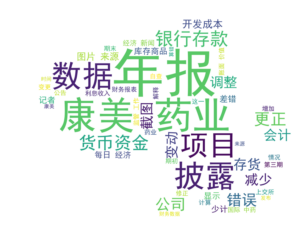

In [26]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [17]:
mytext = '''
General Python FAQ
General Information
What is Python?
What is the Python Software Foundation?
Are there copyright restrictions on the use of Python?
Why was Python created in the first place?
What is Python good for?
How does the Python version numbering scheme work?
How do I obtain a copy of the Python source?
How do I get documentation on Python?
I’ve never programmed before. Is there a Python tutorial?
Is there a newsgroup or mailing list devoted to Python?
How do I get a beta test version of Python?
How do I submit bug reports and patches for Python?
Are there any published articles about Python that I can reference?
Are there any books on Python?
Where in the world is www.python.org located?
Why is it called Python?
Do I have to like “Monty Python’s Flying Circus”?
Python in the real world
How stable is Python?
How many people are using Python?
Have any significant projects been done in Python?
What new developments are expected for Python in the future?
Is it reasonable to propose incompatible changes to Python?
Is Python a good language for beginning programmers?
General Information
What is Python?
Python is an interpreted, interactive, object-oriented programming language. It incorporates modules, exceptions, dynamic typing, very high level dynamic data types, and classes. Python combines remarkable power with very clear syntax. It has interfaces to many system calls and libraries, as well as to various window systems, and is extensible in C or C++. It is also usable as an extension language for applications that need a programmable interface. Finally, Python is portable: it runs on many Unix variants, on the Mac, and on Windows 2000 and later.
'''

In [15]:
mytext

'\nThere are also good IDEs for Python. IDLE is a cross-platform IDE for Python that is written in Python using Tkinter. PythonWin is a Windows-specific IDE. Emacs users will be happy to know that there is a very good Python mode for Emacs. All of these programming environments provide syntax highlighting, auto-indenting, and access to the interactive interpreter while coding. Consult the Python wiki for a full list of Python editing environments.\n'

In [33]:
wordcloud = WordCloud().generate_from_frequencies(wc)

TypeError: argument of type 'int' is not iterable

Populating the interactive namespace from numpy and matplotlib


(-0.5, 399.5, 199.5, -0.5)

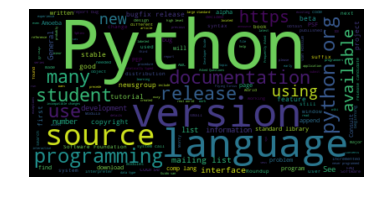

In [32]:
%pylab inline
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = True
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [29]:
wc = dict([("A",0.2),("T",0.5),(5,0.2),("r",0.8),("q",0.95)])

In [34]:
wc

{'A': 0.2, 'T': 0.5, 5: 0.2, 'r': 0.8, 'q': 0.95}

In [31]:
wordcloud

In [22]:
wordcloud.to_array

<bound method WordCloud.to_array of <wordcloud.wordcloud.WordCloud object at 0x00000202E03459E8>>

In [ ]:
tag_stat = Counter(guichu_tag['tag'])
back_color = imread('D:/爬虫/鬼畜/bilibili.jpg') # 解析该图片

wc = WordCloud(background_color='white', # 背景颜色
max_words=100, # 最大词数
mask=back_color, # 以该参数值作图绘制词云，这个参数不为空时，width和height会被忽略
max_font_size=200, # 显示字体的最大值
font_path="C:/Windows/Fonts/STFANGSO.ttf", # 解决显示口字型乱码问题，可进入C:/Windows/Fonts/目录更换字体
random_state=42, # 为每个词返回一个PIL颜色
# width=1000, # 图片的宽
# height=860 #图片的长
)
# WordCloud各含义参数请点击 wordcloud参数
image_colors = ImageColorGenerator(back_color)
wc.generate_from_frequencies(tag_stat)

plt.figure(figsize=(8,8),dpi=80)
plt.imshow(wc.recolor(color_func=image_colors))
plt.axis('off')

## 绘制图片
renwu_stat_year_18 = tag_count_year[(tag_count_year['year']=='2018') & (tag_count_year['type']=='人物')]
renwu_stat_year_18.sort_values('danmu',ascending=False,inplace=True)
attr = renwu_stat_year_18['tag'][0:10]
v1 = renwu_stat_year_18['danmu'][0:10]
bar = Bar("2018人物弹幕数量TOP10")
bar.add("弹幕数量", attr, v1, is_stack=True, xaxis_rotate=30,xaxis_label_textsize=18,
xaxis_interval =0,is_splitline_show=False,label_text_size=12,is_label_show=True)
bar.render('2018人物弹幕数量TOP10.html')

In [3]:
# Test
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import jieba
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

back_img = Image.open("wordcloudshape.png")

with open("stop_words_list.txt", "r", encoding="utf-8") as rf:
    stopwords = set(rf.read().split("\n"))
    
wordcloudshape = np.array(back_img)
# 分部设置词云格式
wc = WordCloud(
    background_color='white',   # 背景颜色
    max_words=50,               # 最大词数
    mask=wordcloudshape,        # 以该参数值作图绘制词云，这个参数不为空时，width和height会被忽略
    scale=2,                    # 按照比例进行放大画布
    max_font_size=200,          # 显示字体的最大值
    font_path="C:/Windows/Fonts/simhei.ttf",  # 解决显示口口口字型乱码问题，可进入C:/Windows/Fonts/目录更换字体
    random_state=42,            # 为每个词返回一个PIL颜色
    stopwords=stopwords         # 排除词，数据类型为 集合set() = {"和", "而且", "但是" ...}
    # width=1000,               # 图片的宽
    # height=860                # 图片的长
)

with open("all.txt", "r", encoding="utf-8") as rf:
    mytext = rf.read()


In [4]:
with open("China - United State trade war.txt", "r", encoding="utf-8") as rf:
    mytext = rf.read()


In [5]:
wordcloud = wc.generate(mytext)

(-0.5, 2047.5, 1661.5, -0.5)

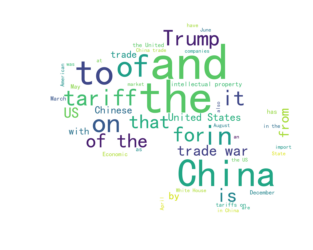

In [6]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.savefig("all.png", dpi=300, )
plt.axis('off')

In [55]:
mytext = " ".join(jieba.cut(mytext))                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
wordcloud = wc.generate(mytext)

(-0.5, 2047.5, 1661.5, -0.5)

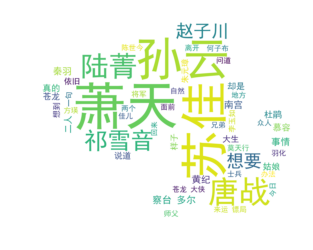

In [56]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.savefig("all.png", dpi=300, )
plt.axis('off')

In [37]:
ff = wordcloud.words_

In [ ]:
jieba分词与worldcloud词云
中文分词的优秀库。

安装：pip install jieba

主要有三种模式，但是最主要有一个函数

模式：精确模式：把文本精确的切分开，不存在冗余单词

　　全模式：把文本中所有可能的词语都扫描出来，有冗余

　　搜索引擎模式：在精确模式上，对长词再次切分

函数：jieba.lcut(str)：精确模式，返回一个列表

　　jieba.lcut(str，cut_all=True)：就变成全模式，存在冗余

　　jieba.lcut_for_search(str)：搜索引擎模式，返回列表，有冗余

　　jieba.add_word(str)：向分词词典增加新的分词str

 

词云优秀库。

安装：pip insatll wordcloud

wordcloud将词云视为WordCloud对象

w = wordcloud.WordCloud()代表一个文本对应的词云

有两个可选参数，width=400,height=200,min_font_size=字体最小默认4,max_font_size=字体最大，根据高度自动调节，

font_step=2字体间隔,font_path=''字体路径,max_words=200词云数量,stop_words={'str'}排除词,background_color='white'词云背景颜色默认黑色

w.generate(txt)　　# txt是str，向w对象中加载txt文本

w.tofile(filename)　　# 将词云输出为图像文件，为png/jpg文件，默认400*200像素（分隔，统计，字体，布局）

对于显示非矩形词云，需要使用mask

from scipy.misc import imread

mk = imread('pic.png')　　# 形状的图片，背景白色。

w = wordcloud.WordCloud(mask=mk)

In [31]:
# WordCloud 参数
class WordCloud(object):
    def __init__(self, font_path=None, width=400, height=200, margin=2,
             ranks_only=None, prefer_horizontal=.9, mask=None, scale=1,
             color_func=None, max_words=200, min_font_size=4,
             stopwords=None, random_state=None, background_color='black',
             max_font_size=None, font_step=1, mode="RGB",
             relative_scaling=.5, regexp=None, collocations=True,
             colormap=None, normalize_plurals=True):
          pass


font_path : string //字体路径，需要展现什么字体就把该字体路径+后缀名写上，如：font_path = '黑体.ttf'
 
width : int (default=400) //输出的画布宽度，默认为400像素
 
height : int (default=200) //输出的画布高度，默认为200像素
 
prefer_horizontal : float (default=0.90) //词语水平方向排版出现的频率，默认 0.9 （所以词语垂直方向排版出现频率为 0.1 ）
 
mask : nd-array or None (default=None) //如果参数为空，则使用二维遮罩绘制词云。如果 mask 非空，设置的宽高值将被忽略，遮罩形状被 mask 取代。除全白（#FFFFFF）的部分将不会绘制，其余部分会用于绘制词云。如：bg_pic = imread('读取一张图片.png')，背景图片的画布一定要设置为白色（#FFFFFF），然后显示的形状为不是白色的其他颜色。可以用ps工具将自己要显示的形状复制到一个纯白色的画布上再保存，就ok了。
 
scale : float (default=1) //按照比例进行放大画布，如设置为1.5，则长和宽都是原来画布的1.5倍。
 
min_font_size : int (default=4) //显示的最小的字体大小
 
font_step : int (default=1) //字体步长，如果步长大于1，会加快运算但是可能导致结果出现较大的误差。
 
max_words : number (default=200) //要显示的词的最大个数
 
stopwords : set of strings or None //设置需要屏蔽的词，如果为空，则使用内置的STOPWORDS
 
background_color : color value (default=”black”) //背景颜色，如  background_color='white',背景颜色为白色。
 
max_font_size : int or None (default=None) //显示的最大的字体大小
 
mode : string (default=”RGB”) //当参数为“RGBA”并且background_color不为空时，背景为透明。
 
relative_scaling : float (default=.5) //词频和字体大小的关联性
 
color_func : callable, default=None //生成新颜色的函数，如果为空，则使用 self.color_func
 
regexp : string or None (optional) //使用正则表达式分隔输入的文本
 
collocations : bool, default=True //是否包括两个词的搭配
 
colormap : string or matplotlib colormap, default=”viridis” //给每个单词随机分配颜色，若指定color_func，则忽略该方法。
 
 
 
fit_words(frequencies)  //根据词频生成词云 # frequencies : dict from string to float {'萧天': 1.0}
generate(text)  //根据文本生成词云
generate_from_frequencies(frequencies[, ...])   //根据词频生成词云
generate_from_text(text)    //根据文本生成词云
process_text(text)  //将长文本分词并去除屏蔽词（此处指英语，中文分词还是需要自己用别的库先行实现，使用上面的   fit_words(frequencies) ）
recolor([random_state, color_func, colormap])   //对现有输出重新着色。重新上色会比重新生成整个词云快很多。
to_array()  //转化为 numpy array
to_file(filename)   //输出到文件

{'萧天': 1.0,
 '苏佳': 0.8872261345852895,
 '孙云': 0.8020344287949922,
 '唐战': 0.5766823161189358,
 '陆菁': 0.4612676056338028,
 '祁雪音': 0.3611111111111111,
 '赵子川': 0.35269953051643194,
 '想要': 0.3445813771517997,
 '察台 多尔': 0.2934272300469484,
 '事情': 0.28501564945226915,
 '秦羽': 0.28012519561815336,
 '南宫': 0.27826682316118934,
 '黄纪': 0.2711267605633803,
 '二人': 0.2414906103286385,
 '慕容': 0.23894757433489827,
 '真的': 0.2367957746478873,
 '杜鹃': 0.23337245696400627,
 '姑娘': 0.2189945226917058,
 '却是': 0.21557120500782473,
 '苍龙': 0.2098982785602504,
 '大生': 0.2020735524256651,
 '说道': 0.19581377151799687,
 '样子': 0.1929773082942097,
 '依旧': 0.1843701095461659,
 '朱元璋': 0.18427230046948356,
 '想到': 0.16881846635367762,
 '将军': 0.1613849765258216,
 '一句': 0.15629890453834117,
 '李玉如': 0.15541862284820032,
 '两个': 0.1480829420970266,
 '今日': 0.14710485133020346,
 '自然': 0.14534428794992174,
 '离开': 0.14368153364632238,
 '苍龙 大侠': 0.14280125195618154,
 '来运 镖局': 0.142018779342723,
 '陈世今': 0.14094287949921752,
 '面前': 0.1383

In [48]:
plt.imshow?
plt.imshow(
    X,
    cmap=None,
    norm=None,
    aspect=None,
    interpolation=None,
    alpha=None,
    vmin=None,
    vmax=None,
    origin=None,
    extent=None,
    shape=None,
    filternorm=1,
    filterrad=4.0,
    imlim=None,
    resample=None,
    url=None,
    *,
    data=None,
    **kwargs,
)

In [43]:
plt.savefig?
savefig(fname, dpi=None, facecolor='w', edgecolor='w',
      orientation='portrait', papertype=None, format=None,
      transparent=False, bbox_inches=None, pad_inches=0.1,
      frameon=None, metadata=None)

In [34]:
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

b'Hello, TensorFlow!'
